### Membros do grupo
- Eugênio Pacheco
- Isabella Beserra
- José Venâncio
- Julia Muto
- Willker Menezes

# Dataset

Os dados são de clientes do Ifood visando criar a segmentação de clientes e um modelo que consiga prever a probabilidade do cliente ser impactado por uma campanha de oferta

## Metadados
Pessoas:
- ID: Identificador único do cliente
- Year_Birth: Ano de nascimento do cliente
- Education: Nível de educação do cliente
- Marital_Status: Estado civil do cliente
- Income: Renda anual do agregado familiar do cliente
- Kidhome: Número de crianças no agregado familiar do cliente
- Teenhome: Número de adolescentes no agregado familiar do cliente
- Dt_Customer: Data de inscrição do cliente na empresa
- Recency: Número de dias desde a última compra do cliente
- Complain: 1 se o cliente fez uma reclamação nos últimos 2 anos, 0 caso contrário

-----------------

Produtos
- MntWines: Valor gasto em vinho nos últimos 2 anos
- MntFruits: Valor gasto em frutas nos últimos 2 anos
- MntMeatProducts: Valor gasto em carne nos últimos 2 anos
- MntFishProducts: Valor gasto em peixe nos últimos 2 anos
- MntSweetProducts: Valor gasto em doces nos últimos 2 anos
- MntGoldProds: Valor gasto em ouro nos últimos 2 anos

-----------------

Promoção:
- NumDealsPurchases: Número de compras feitas com desconto
- AcceptedCmp1: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
- AcceptedCmp2: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
- AcceptedCmp3: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
- AcceptedCmp4: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
- AcceptedCmp5: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
- Response: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

-----------------

Meio:
- NumWebPurchases: Número de compras feitas através do site da empresa
- NumCatalogPurchases: Número de compras feitas usando um catálogo
- NumStorePurchases: Número de compras feitas diretamente em lojas
- NumWebVisitsMonth: Número de visitas ao site da empresa no último mês

# Menu:
- [Investigação Inicial do Dataset](#investigacao_inicial)
- [Ajuste inicial dos dados](#ajuste_inicial_dos_dados)
- [Visualização inicial dos dados](#visualizacao_inicial_dos_dados)

# Importações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, recall_score, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# EDA

## Investigação inicial do dataset

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

In [3]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.duplicated().sum()

0

In [6]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [7]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [8]:
df['Dt_Customer'].value_counts()

31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 663, dtype: int64

In [9]:
df['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [10]:
df['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [11]:
df['Income'].isna().sum()

24

## Ajuste inicial dos dados

In [12]:
df2 = df.copy(deep=True)

In [13]:
df2['Marital_Status'] = df2['Marital_Status'].map({'Single': 'Single', 'Together': 'Together', 'Married': 'Married', 'Divorced': 'Divorced', 'Widow': 'Widow', 'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'})

In [14]:
df2.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

In [15]:
df2['Income'] = df2['Income'].apply(lambda x: 0 if np.isnan(x) else x)

In [16]:
df2['Age'] = df2['Year_Birth'].apply(lambda x: 2020 - x)

## Visualização inicial dos dados

### Pessoas

### Ano de Nascimento

<AxesSubplot: xlabel='Year_Birth', ylabel='Count'>

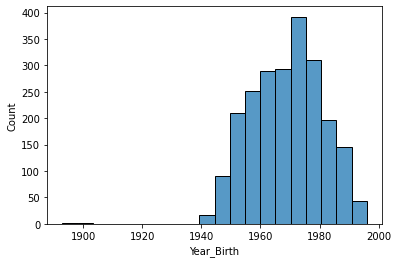

In [17]:
sns.histplot(df2, x="Year_Birth", bins=20)

### Escolaridade

In [18]:
sns.histplot(df2, x="Education", bins=20)

<AxesSubplot: xlabel='Education', ylabel='Count'>

### Estado civil

<AxesSubplot: xlabel='Marital_Status', ylabel='Count'>

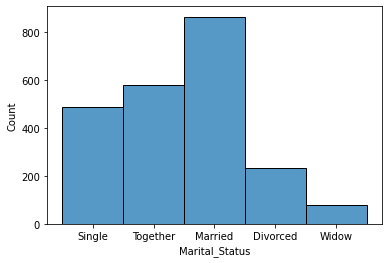

In [19]:
sns.histplot(df2, x="Marital_Status", bins=20)

### Renda Anual

<AxesSubplot: xlabel='Income', ylabel='Count'>

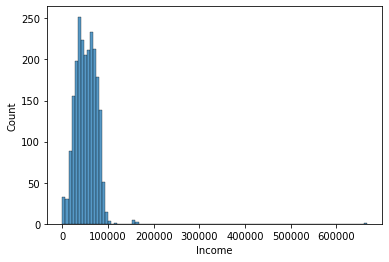

In [20]:
sns.histplot(df2, x="Income", bins=100)

### Número de crianças

<AxesSubplot: xlabel='Kidhome', ylabel='Count'>

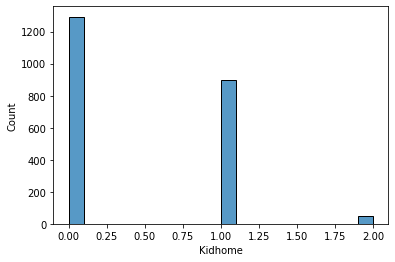

In [21]:
sns.histplot(df2, x="Kidhome", bins=20)

### Número de adolescentes

<AxesSubplot: xlabel='Teenhome', ylabel='Count'>

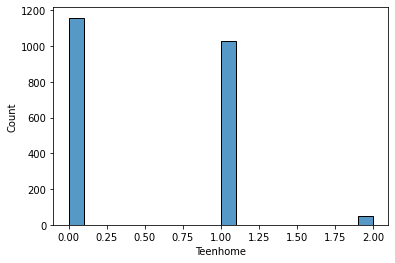

In [22]:
sns.histplot(df2, x="Teenhome", bins=20)

### Data de inscrição na empresa

<AxesSubplot: xlabel='Dt_Customer', ylabel='Count'>

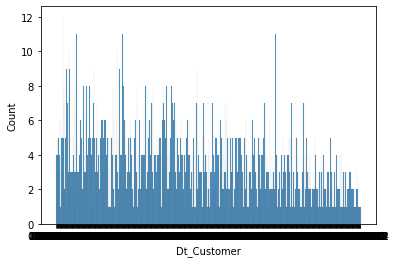

In [23]:
sns.histplot(df2, x="Dt_Customer", bins=20)

### Dias desde a última compra

<AxesSubplot: xlabel='Recency', ylabel='Count'>

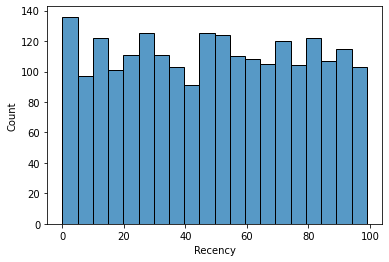

In [24]:
sns.histplot(df2, x="Recency", bins=20)

### Reclamação nos últimos 2 anos

<AxesSubplot: xlabel='Complain', ylabel='Count'>

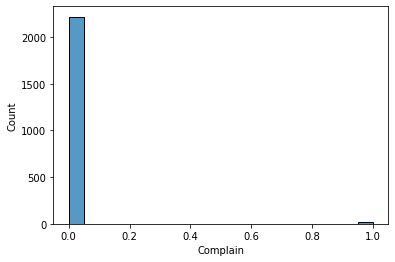

In [25]:
sns.histplot(df2, x="Complain", bins=20)

### Produtos

**Valores gastos em produtos nos últimos 2 anos**

### Vinho

In [26]:
sns.histplot(df2, x="MntWines", bins=20)

<AxesSubplot: xlabel='MntWines', ylabel='Count'>

### Frutas

<AxesSubplot: xlabel='MntFruits', ylabel='Count'>

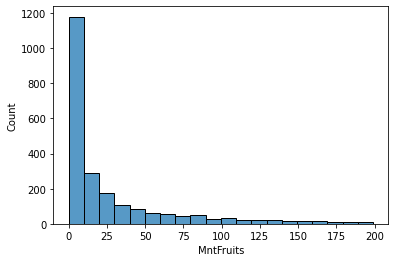

In [27]:
sns.histplot(df2, x="MntFruits", bins=20)

### Carnes

In [28]:
sns.histplot(df2, x="MntMeatProducts", bins=20)

<AxesSubplot: xlabel='MntMeatProducts', ylabel='Count'>

### Peixes

<AxesSubplot: xlabel='MntFishProducts', ylabel='Count'>

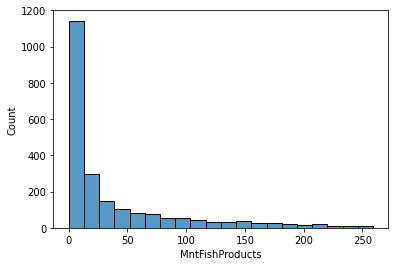

In [29]:
sns.histplot(df2, x="MntFishProducts", bins=20)

### Doces

<AxesSubplot: xlabel='MntSweetProducts', ylabel='Count'>

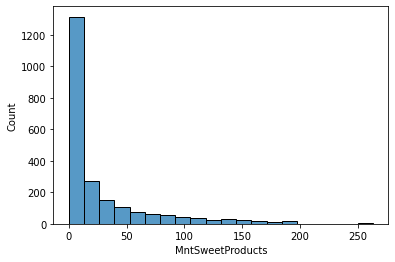

In [30]:
sns.histplot(df2, x="MntSweetProducts", bins=20)

### Produtos Ouro

In [31]:
sns.histplot(df2, x="MntGoldProds", bins=20)

<AxesSubplot: xlabel='MntGoldProds', ylabel='Count'>

### Promoção

### Compras com desconto

<AxesSubplot: xlabel='NumDealsPurchases', ylabel='Count'>

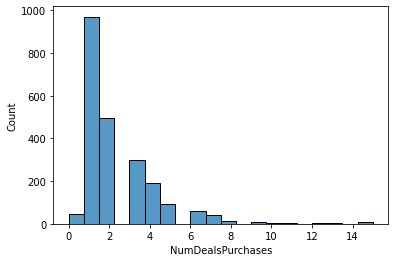

In [32]:
sns.histplot(df2, x="NumDealsPurchases", bins=20)

### Compra na 1ª oferta

In [33]:
sns.histplot(df2, x="AcceptedCmp1", bins=20)

<AxesSubplot: xlabel='AcceptedCmp1', ylabel='Count'>

### Compra na 2ª oferta

<AxesSubplot: xlabel='AcceptedCmp2', ylabel='Count'>

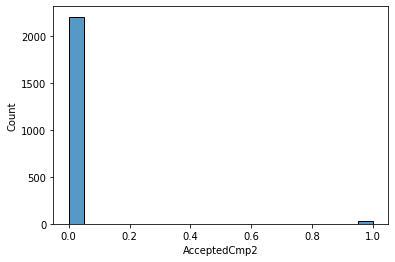

In [34]:
sns.histplot(df2, x="AcceptedCmp2", bins=20)

### Compra na 3ª oferta

<AxesSubplot: xlabel='AcceptedCmp3', ylabel='Count'>

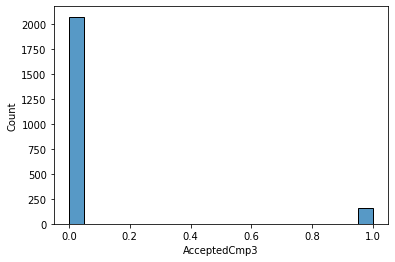

In [35]:
sns.histplot(df2, x="AcceptedCmp3", bins=20)

### Compra na 4ª oferta

<AxesSubplot: xlabel='AcceptedCmp4', ylabel='Count'>

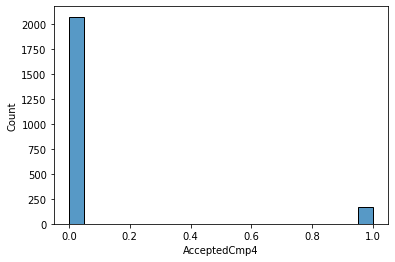

In [36]:
sns.histplot(df2, x="AcceptedCmp4", bins=20)

### Compra na 5ª oferta

<AxesSubplot: xlabel='AcceptedCmp5', ylabel='Count'>

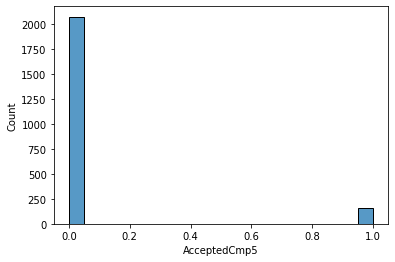

In [37]:
sns.histplot(df2, x="AcceptedCmp5", bins=20)

### Compra na última oferta

In [38]:
sns.histplot(df2, x="Response", bins=20)

<AxesSubplot: xlabel='Response', ylabel='Count'>

### Meio

### Compras feitas por site

<AxesSubplot: xlabel='NumWebPurchases', ylabel='Count'>

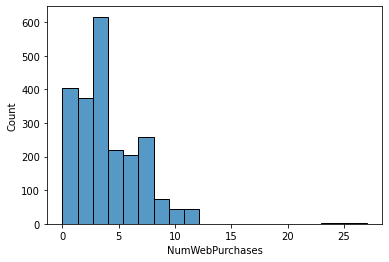

In [39]:
sns.histplot(df2, x="NumWebPurchases", bins=20)

### Compras feitas com catálogo

<AxesSubplot: xlabel='NumCatalogPurchases', ylabel='Count'>

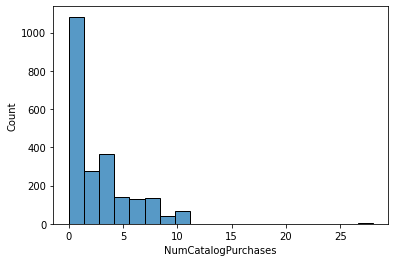

In [40]:
sns.histplot(df2, x="NumCatalogPurchases", bins=20)

### Compras feitas diretamente nas lojas

<AxesSubplot: xlabel='NumStorePurchases', ylabel='Count'>

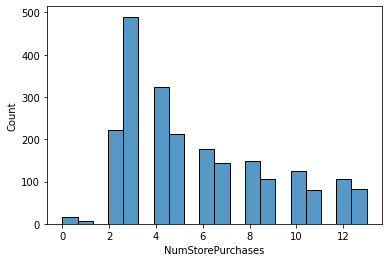

In [41]:
sns.histplot(df2, x="NumStorePurchases", bins=20)

### Visitas feitas ao site no último mês

<AxesSubplot: xlabel='NumWebVisitsMonth', ylabel='Count'>

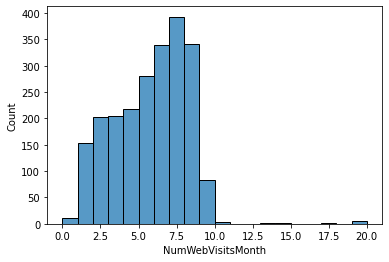

In [42]:
sns.histplot(df2, x="NumWebVisitsMonth", bins=20)

# Transformações e adições

### Educação

Sugestão da Julia: deixar educação como escalar

In [43]:
df2['Education'] = df2['Education'].map({'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5})

### Estado civil

In [44]:
df2 = pd.get_dummies(df2, columns=["Marital_Status"], prefix="Marital_Status")

### Renda Anual

In [45]:
df2['Income'] = df2['Income'].apply(lambda x: int(x))

### Compra em oferta

In [46]:
df2['AcceptedCmpOverall'] = df2['AcceptedCmp1'] + df2['AcceptedCmp2'] + df2['AcceptedCmp3'] + df2['AcceptedCmp4'] + df2['AcceptedCmp5'] + df2['Response']

In [47]:
df2['AcceptedCmpOverall'] = df2['AcceptedCmpOverall'].apply(lambda x: 1 if x>0 else 0)

# Ajustes prévios a modelagem

In [48]:
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'AcceptedCmpOverall'],
      dtype='object')

In [49]:
df2.drop(columns=['ID', 'Year_Birth', 'Dt_Customer'], inplace=True)

# Análise de correlações

<AxesSubplot: >

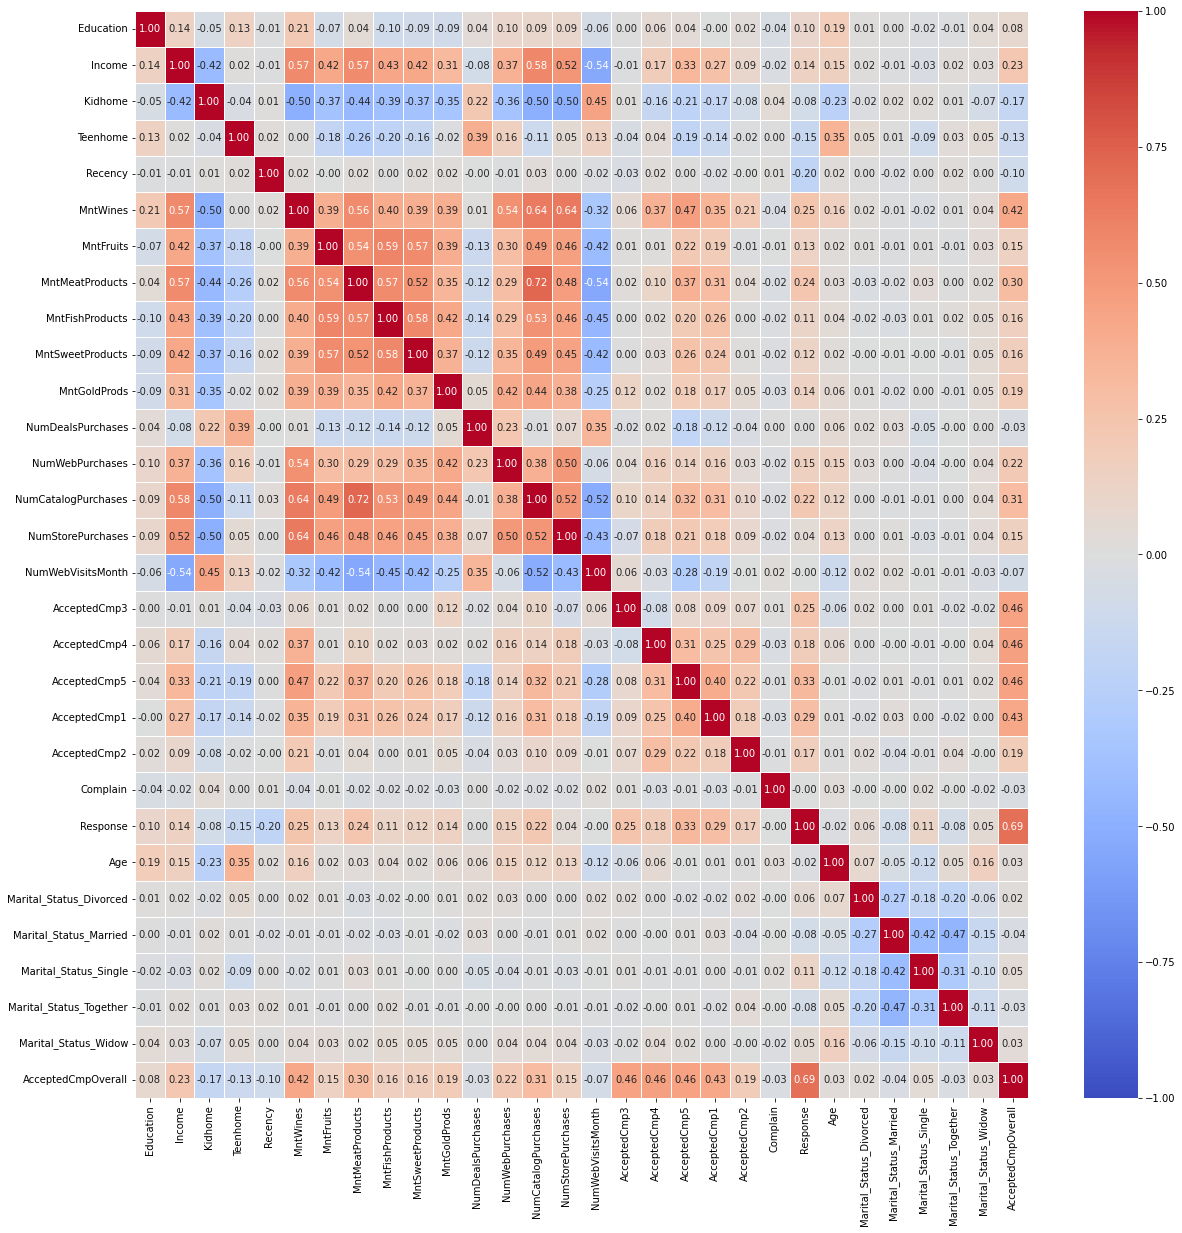

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(), vmax=1, vmin=-1, cmap='coolwarm', annot=True, linewidths=0.5, fmt='.2f')

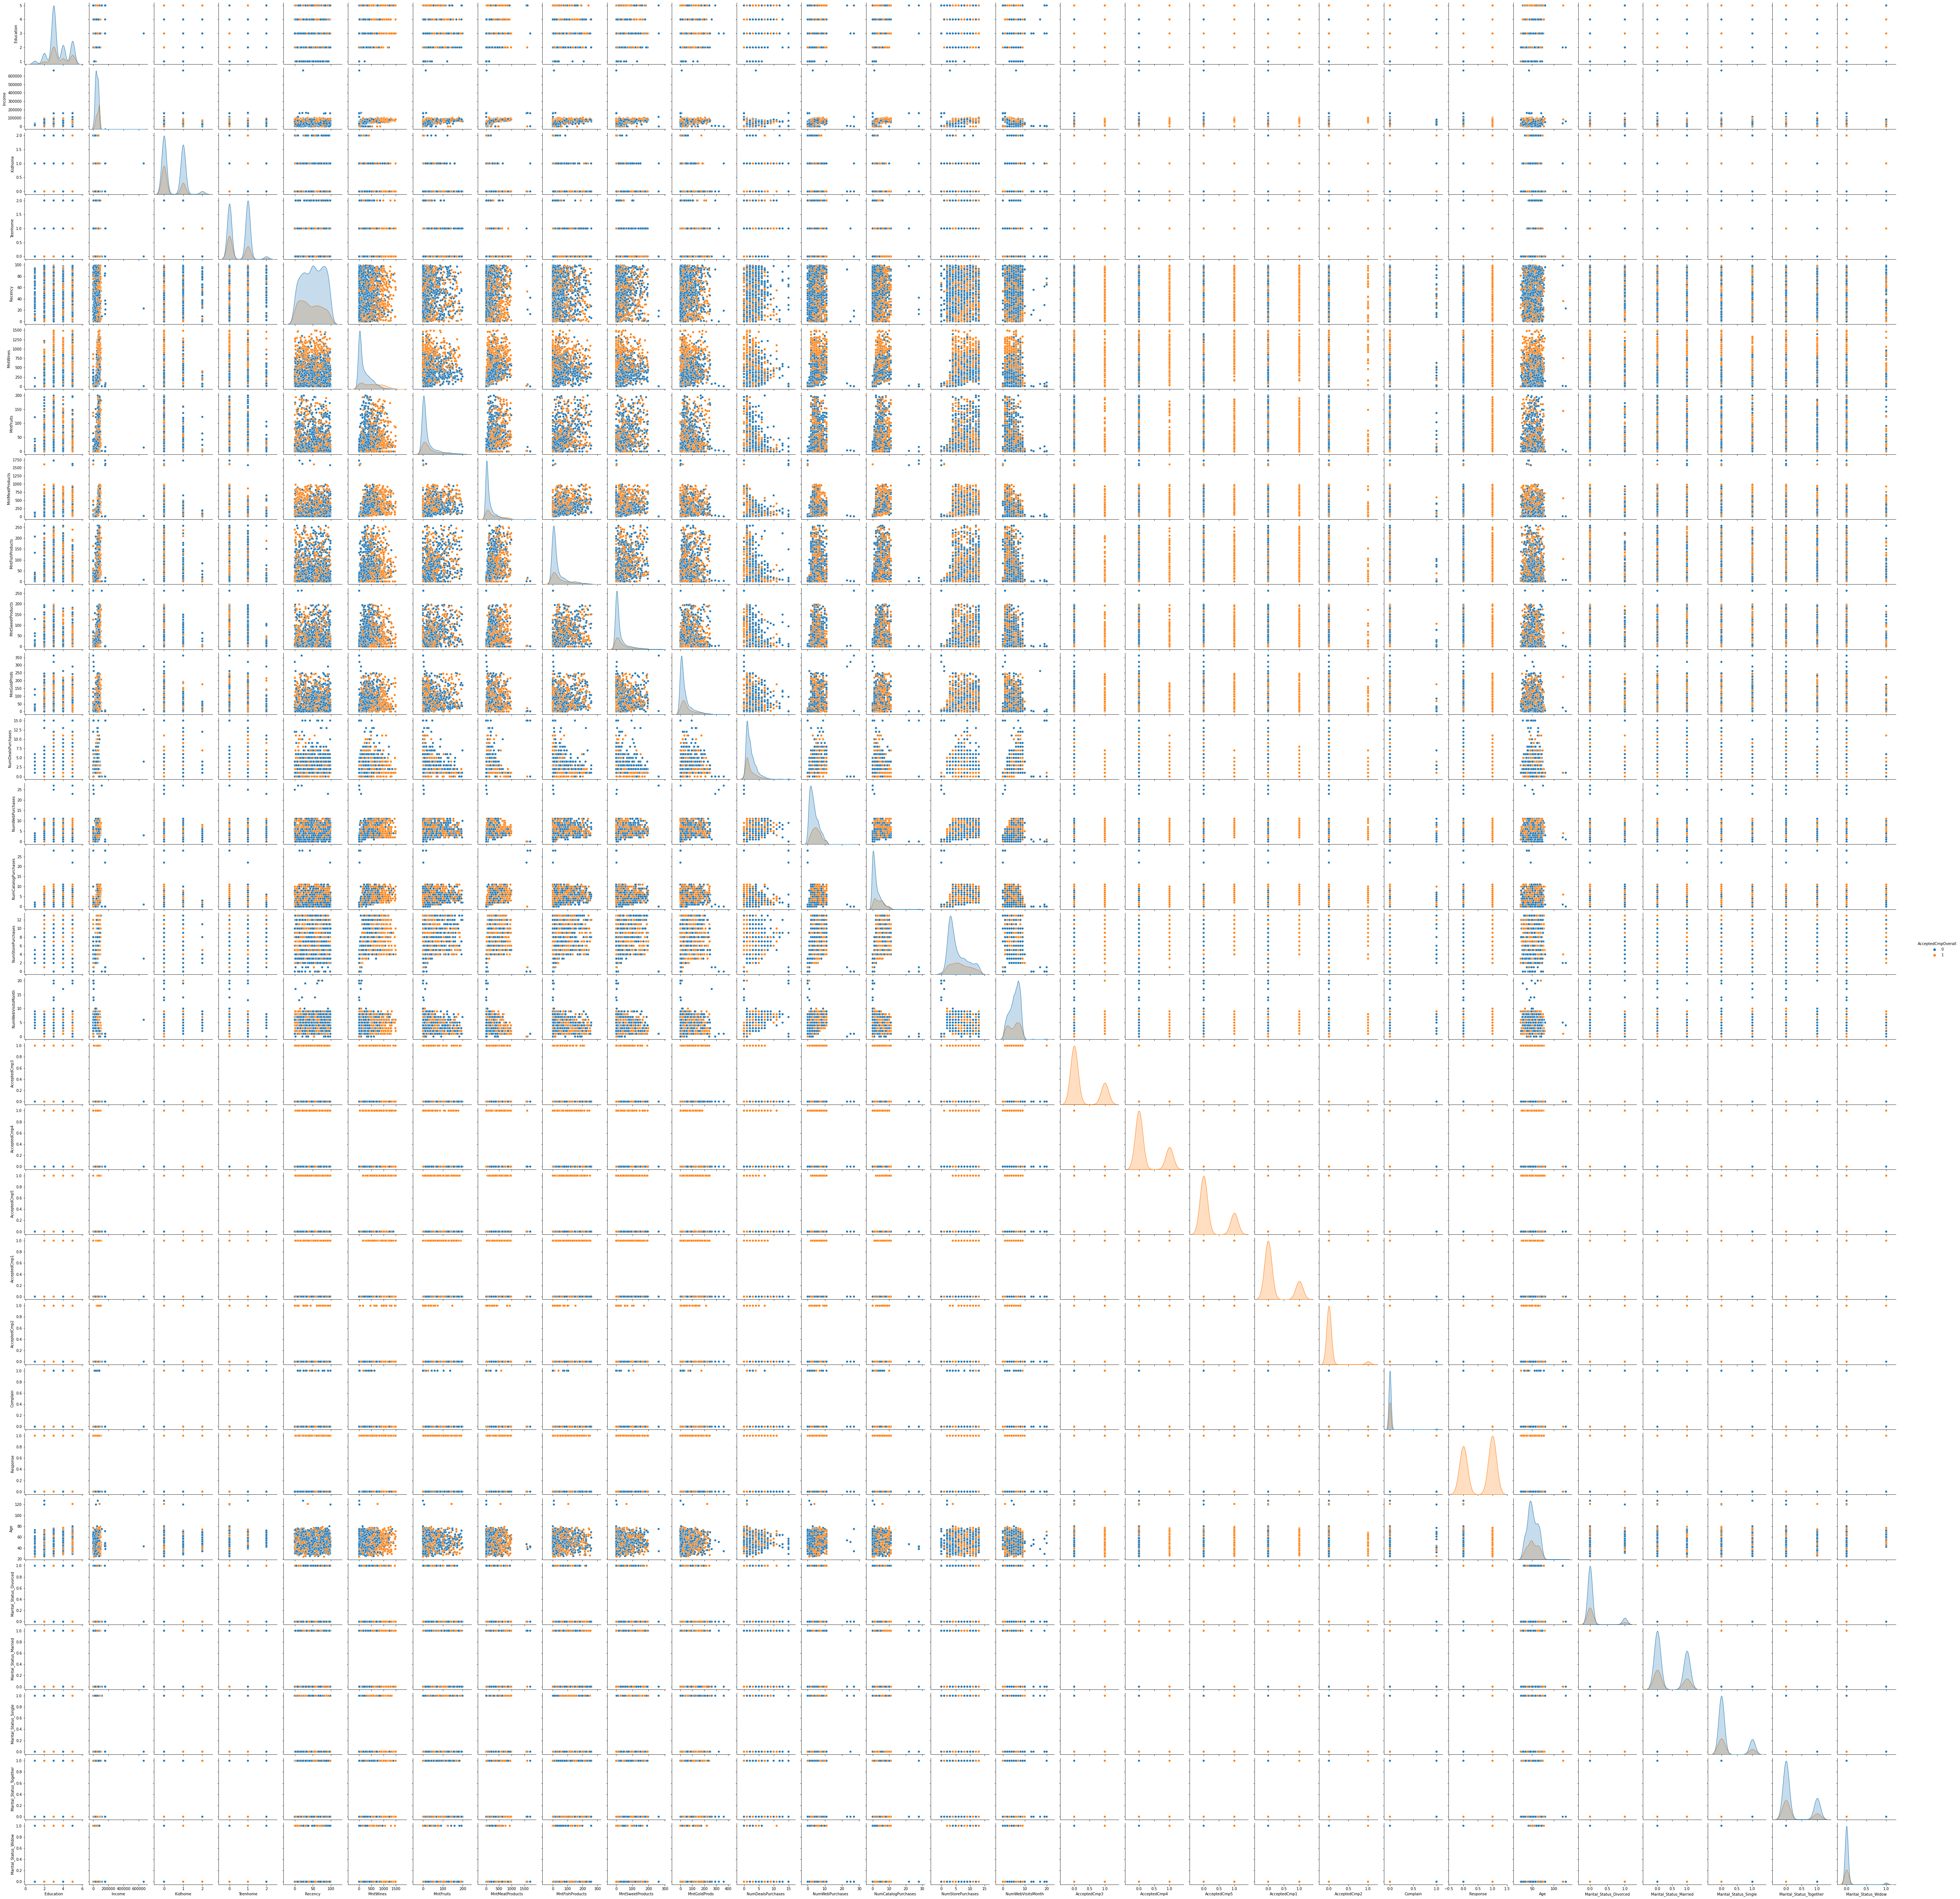

In [51]:
sns.pairplot(df2, hue = 'AcceptedCmpOverall')

In [52]:
target_corr_temp = abs(df2.corr().drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','AcceptedCmpOverall']).loc['AcceptedCmpOverall']).sort_values(ascending=False)

target_corr = {}
df2_columns_to_drop = []

for i in range(len(target_corr_temp.index)):
    if target_corr_temp.values[i] >= 0.05:
        target_corr[target_corr_temp.index[i]] = target_corr_temp.values[i]
    else:
        df2_columns_to_drop.append(target_corr_temp.index[i])

target_corr = pd.Series(data=target_corr)

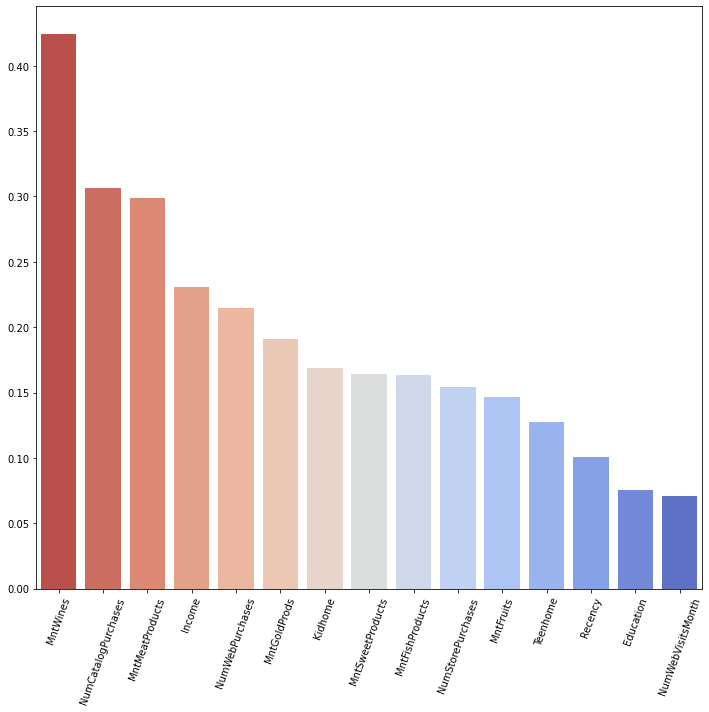

In [53]:
plt.figure(figsize=(10,10))
sns.barplot(x=target_corr.index, y=target_corr.values, palette='coolwarm_r')
plt.xticks(rotation=70)
plt.tight_layout()

Baseado no heatmap, para o nosso target 'AcceptecCmpOverall', faz sentido droparmos as seguintes colunas:
 - 'AcceptedCmp1' (Multicolinearidade)
 - 'AcceptedCmp2' (Multicolinearidade)
 - 'AcceptedCmp3' (Multicolinearidade)
 - 'AcceptedCmp4' (Multicolinearidade)
 - 'AcceptedCmp5' (Multicolinearidade)
 - 'Response' (Multicolinearidade)

 Além disso, vamos manter um mínimo de 0.05 para correlação absoluta

In [54]:
df2_columns_to_drop.append('AcceptedCmp1')
df2_columns_to_drop.append('AcceptedCmp2')
df2_columns_to_drop.append('AcceptedCmp3')
df2_columns_to_drop.append('AcceptedCmp4')
df2_columns_to_drop.append('AcceptedCmp5')
df2_columns_to_drop.append('Response')

In [55]:
df2_predictive_model = df2.copy(deep=True)
df2_predictive_model.drop(columns=df2_columns_to_drop, inplace=True)

In [56]:
df2_predictive_model

Education  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0             3   58138        0         0       58       635         88   
1             3   46344        1         1       38        11          1   
2             3   71613        0         0       26       426         49   
3             3   26646        1         0       26        11          4   
4             5   58293        1         0       94       173         43   
...         ...     ...      ...       ...      ...       ...        ...   
2235          3   61223        0         1       46       709         43   
2236          5   64014        2         1       56       406          0   
2237          3   56981        0         0       91       908         48   
2238          4   69245        0         1        8       428         30   
2239          5   52869        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2235              182               42               118           247   
2236               30                0                 0             8   
2237              217               32                12            24   
2238              214               80                30            61   
2239               61                2                 1            21   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmpOverall  
0                     7                   1  
1                     5                   0  
2                     4                   0  
3                     6                   0  
4                     5                   0  
...                 ...                 ...  
2235                  5                   0  
2236                  7                   1  
2237                  6                   1  
2238                  3                   0  
2239                  7                   1  

[2240 rows x 16 columns]

# Análise Preditiva

## Separação dos dados

In [57]:
y = df2_predictive_model['AcceptedCmpOverall']
X = df2_predictive_model.drop(columns=['AcceptedCmpOverall'])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

### Regressão Logística

In [59]:
# Pipeline:
etapas = [('std_scaler', StandardScaler()),
          ('log_reg', LogisticRegression())]

pipe = Pipeline(etapas)

In [60]:
# KFold Estratificado para CV:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

In [61]:
# Otimização de hiperparâmetros com GridSearch:
param_grid = {
    'log_reg__penalty' : ['', 'l1', 'l2', 'elasticnet'],
    'log_reg__solver'  : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

grid = GridSearchCV(estimator=pipe,
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('log_reg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_reg__penalty': ['', 'l1', 'l2', 'elasticnet'],
                         'log_reg__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                             'newton-cholesky', 'sag',
                                             'saga']},
             scoring=make_scorer(accuracy_score))

In [62]:
# Melhores parâmetros:
grid.best_params_

{'log_reg__penalty': 'l1', 'log_reg__solver': 'liblinear'}

In [63]:
# Melhor métrica com os melhores parâmetros:
grid.best_score_

0.794006206108117

Métricas de avaliação de treino:


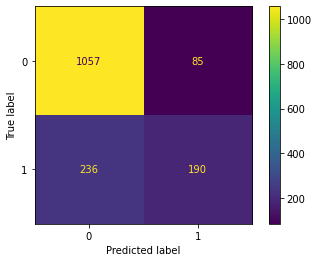

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1142
           1       0.69      0.45      0.54       426

    accuracy                           0.80      1568
   macro avg       0.75      0.69      0.71      1568
weighted avg       0.78      0.80      0.78      1568

Métricas de avaliação de teste:


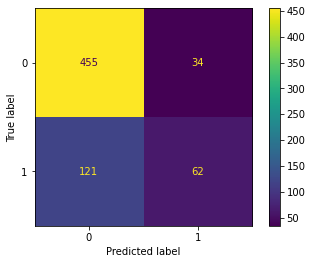

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       489
           1       0.65      0.34      0.44       183

    accuracy                           0.77       672
   macro avg       0.72      0.63      0.65       672
weighted avg       0.75      0.77      0.74       672



In [64]:
print('Métricas de avaliação de treino:')

y_pred_train = grid.predict(X_train)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

print('Métricas de avaliação de teste:')
y_pred_test = grid.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

### KNN

In [65]:
# Pipeline:
etapas = [('std_scaler', StandardScaler()),
          ('knn', KNeighborsClassifier())]

pipe = Pipeline(etapas)

In [66]:
# KFold Estratificado para CV:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

In [67]:
# Otimização de hiperparâmetros com GridSearch:
param_grid = {
    'knn__weights' : ['distance', 'uniform'],
    'knn__metric' : ['manhattan', 'euclidean', 'minkowski'],
    'knn__n_neighbors' : range(3, 20)
}

grid = GridSearchCV(estimator=pipe,
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'minkowski'],
                         'knn__n_neighbors': range(3, 20),
                         'knn__weights': ['distance', 'uniform']},
             scoring=make_scorer(accuracy_score))

In [68]:
# Melhores parâmetros:
grid.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 12,
 'knn__weights': 'distance'}

In [69]:
# Melhor métrica com os melhores parâmetros:
grid.best_score_

0.8022415482606565

Métricas de avaliação de treino:


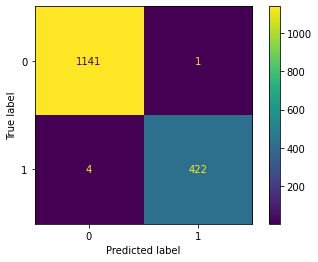

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1142
           1       1.00      0.99      0.99       426

    accuracy                           1.00      1568
   macro avg       1.00      0.99      1.00      1568
weighted avg       1.00      1.00      1.00      1568

Métricas de avaliação de teste:


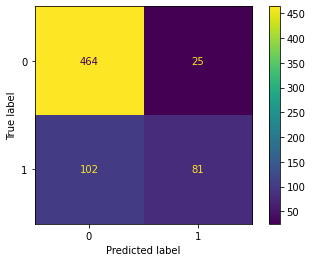

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       489
           1       0.76      0.44      0.56       183

    accuracy                           0.81       672
   macro avg       0.79      0.70      0.72       672
weighted avg       0.80      0.81      0.79       672



In [70]:
print('Métricas de avaliação de treino:')

y_pred_train = grid.predict(X_train)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

print('Métricas de avaliação de teste:')
y_pred_test = grid.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

### Árvore de Decisão

In [71]:
# Pipeline:
etapas = [('std_scaler', StandardScaler()),
          ('dt', DecisionTreeClassifier(random_state=42))]

pipe = Pipeline(etapas)

In [72]:
# KFold Estratificado para CV:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

In [73]:
# Otimização de hiperparâmetros com GridSearch:
param_grid = {
    'dt__criterion' : ['gini', 'entropy'],
    'dt__splitter' : ['best', 'random'],
    'dt__max_depth' : range(2, 11)
}

grid = GridSearchCV(estimator=pipe,
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': range(2, 11),
                         'dt__splitter': ['best', 'random']},
             scoring=make_scorer(accuracy_score))

In [74]:
# Melhores parâmetros:
grid.best_params_

{'dt__criterion': 'entropy', 'dt__max_depth': 2, 'dt__splitter': 'best'}

In [75]:
# Melhor métrica com os melhores parâmetros:
grid.best_score_

0.7876408623223909

Métricas de avaliação de treino:


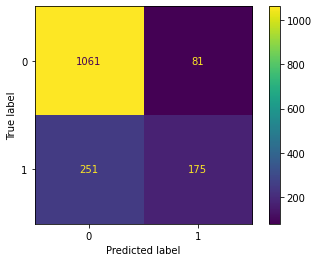

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1142
           1       0.68      0.41      0.51       426

    accuracy                           0.79      1568
   macro avg       0.75      0.67      0.69      1568
weighted avg       0.77      0.79      0.77      1568

Métricas de avaliação de teste:


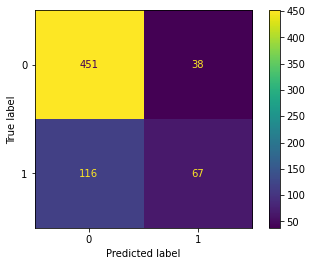

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       489
           1       0.64      0.37      0.47       183

    accuracy                           0.77       672
   macro avg       0.72      0.64      0.66       672
weighted avg       0.75      0.77      0.75       672



In [76]:
print('Métricas de avaliação de treino:')

y_pred_train = grid.predict(X_train)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

print('Métricas de avaliação de teste:')
y_pred_test = grid.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

### Random Forest

In [77]:
# Pipeline:
etapas = [('std_scaler', StandardScaler()),
          ('rf', RandomForestClassifier(random_state=42))]

pipe = Pipeline(etapas)

In [78]:
# KFold Estratificado para CV:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

In [79]:
# Otimização de hiperparâmetros com GridSearch:
param_grid = {
    'rf__n_estimators' : range(100, 600, 100),
    'rf__max_depth' : range(3, 6),
    'rf__max_features' : ['sqrt', 'log2'],
    'rf__criterion' : ['entropy', 'gini']
}

grid = GridSearchCV(estimator=pipe,
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['entropy', 'gini'],
                         'rf__max_depth': range(3, 6),
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__n_estimators': range(100, 600, 100)},
             scoring=make_scorer(accuracy_score))

In [80]:
# Melhores parâmetros:
grid.best_params_

{'rf__criterion': 'gini',
 'rf__max_depth': 5,
 'rf__max_features': 'sqrt',
 'rf__n_estimators': 200}

In [81]:
# Melhor métrica com os melhores parâmetros:
grid.best_score_

0.8010003266372694

Métricas de avaliação de treino:


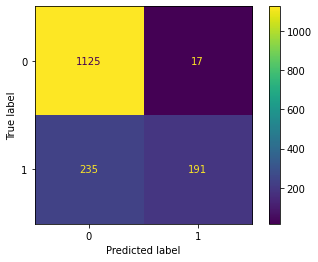

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1142
           1       0.92      0.45      0.60       426

    accuracy                           0.84      1568
   macro avg       0.87      0.72      0.75      1568
weighted avg       0.85      0.84      0.82      1568

Métricas de avaliação de teste:


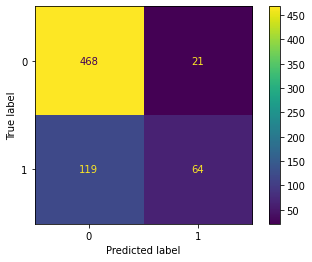

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       489
           1       0.75      0.35      0.48       183

    accuracy                           0.79       672
   macro avg       0.78      0.65      0.67       672
weighted avg       0.79      0.79      0.76       672



In [82]:
print('Métricas de avaliação de treino:')
y_pred_train = grid.predict(X_train)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

print('Métricas de avaliação de teste:')
y_pred_test = grid.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

### SVC

In [83]:
# Pipeline:
etapas = [('std_scaler', StandardScaler()),
          ('svc', SVC(random_state=42))]

pipe = Pipeline(etapas)

In [84]:
# KFold Estratificado para CV:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

In [85]:
# Otimização de hiperparâmetros com GridSearch:
param_grid = {'svc__kernel': ['linear', 'rbf', 'poly'],
                 'svc__C': np.logspace(-2,2,5),
                 'svc__gamma': np.logspace(-2,2,5)}

grid = GridSearchCV(estimator= pipe,
                        param_grid= param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('svc', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'svc__gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring=make_scorer(accuracy_score))

In [86]:
# Melhores parâmetros:
grid.best_params_

{'svc__C': 1.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

In [87]:
# Melhor métrica com os melhores parâmetros:
grid.best_score_

0.7971664216887147

Métricas de avaliação de treino:


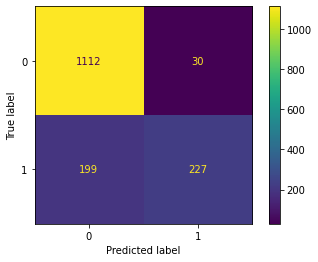

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1142
           1       0.88      0.53      0.66       426

    accuracy                           0.85      1568
   macro avg       0.87      0.75      0.79      1568
weighted avg       0.86      0.85      0.84      1568

Métricas de avaliação de teste:


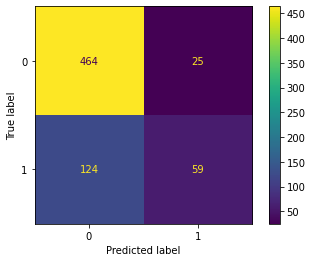

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       489
           1       0.70      0.32      0.44       183

    accuracy                           0.78       672
   macro avg       0.75      0.64      0.65       672
weighted avg       0.77      0.78      0.75       672



In [88]:
print('Métricas de avaliação de treino:')
y_pred_train = grid.predict(X_train)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

print('Métricas de avaliação de teste:')
y_pred_test = grid.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

### AdaBoost

In [89]:
# Pipeline:
etapas = [('std_scaler', StandardScaler()),
          ('ab', AdaBoostClassifier(random_state = 42))]

pipe = Pipeline(etapas)

In [90]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('ab', AdaBoostClassifier(random_state=42))])

In [91]:
def metricas_classificacao(estimator):

    print("\nMétricas da avaliação de treino:")
    
    y_pred_train = estimator.predict(X_train) # predição sobre os dados de treinamento
    
    print(confusion_matrix(y_train, y_pred_train)) # matriz de confusão
    
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()
    
    print(classification_report(y_train, y_pred_train))
    

    print("\nMétricas da avaliação de teste:")
    
    y_pred_test = estimator.predict(X_test) # predição sobre os dados de treinamento
    
    print(confusion_matrix(y_test, y_pred_test)) # matriz de confusão
    
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()
    
    print(classification_report(y_test, y_pred_test))


Métricas da avaliação de treino:
[[1070   72]
 [ 189  237]]


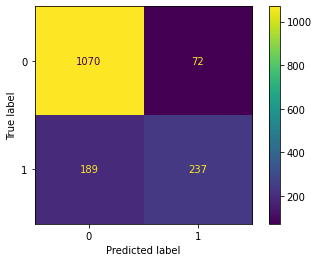

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1142
           1       0.77      0.56      0.64       426

    accuracy                           0.83      1568
   macro avg       0.81      0.75      0.77      1568
weighted avg       0.83      0.83      0.82      1568


Métricas da avaliação de teste:
[[456  33]
 [ 95  88]]


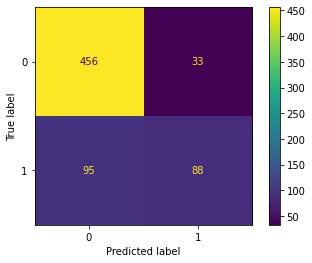

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       489
           1       0.73      0.48      0.58       183

    accuracy                           0.81       672
   macro avg       0.78      0.71      0.73       672
weighted avg       0.80      0.81      0.80       672



In [93]:
metricas_classificacao(pipe)

In [94]:
# Alterando os estimadores

# Pipeline:
etapas = [('std_scaler', StandardScaler()),
          ('ab', AdaBoostClassifier(random_state = 42, n_estimators = 150))]

pipe = Pipeline(etapas)

pipe.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('ab', AdaBoostClassifier(n_estimators=150, random_state=42))])


Métricas da avaliação de treino:
[[1074   68]
 [ 160  266]]


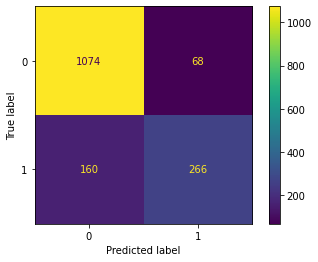

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1142
           1       0.80      0.62      0.70       426

    accuracy                           0.85      1568
   macro avg       0.83      0.78      0.80      1568
weighted avg       0.85      0.85      0.85      1568


Métricas da avaliação de teste:
[[446  43]
 [ 97  86]]


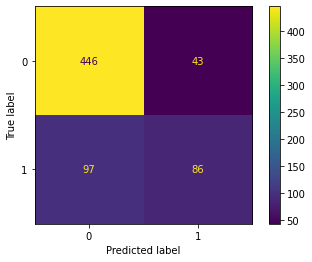

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       489
           1       0.67      0.47      0.55       183

    accuracy                           0.79       672
   macro avg       0.74      0.69      0.71       672
weighted avg       0.78      0.79      0.78       672



In [95]:
metricas_classificacao(pipe)